In [1]:
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
from graphtda import FilteredGraph

In [3]:
edgelist = [(0, 3), (0, 4), (1, 6), (1, 7), (1, 3), (2, 9), (2, 8), (3, 9), (3, 6), (3, 5), (4, 5), (4, 6), (5, 8), (5, 6), (6, 3), (6, 9), (7, 5), (8, 3), (8, 7), (9, 8), (9, 5), (9, 7)]

## Directed Graph

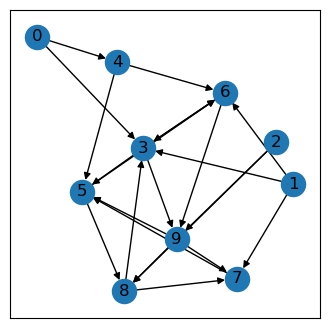

In [4]:
D = nx.DiGraph()
D.add_edges_from(edgelist)
fig, ax = plt.subplots(1, figsize=(4,4))
nx.draw_networkx(D, pos=nx.spring_layout(D, seed=2), ax=ax)

In [5]:
from graphtda.graphtda import in_out_degree_bifiltration

In [6]:
FG = FilteredGraph(D, filtration_function=in_out_degree_bifiltration)

In [7]:
ecp = FG.compute_ECP()

In [8]:
ecp

[((0, 2), 2),
 ((0, 3), 1),
 ((3, 1), 1),
 ((3, 2), -1),
 ((3, 3), -3),
 ((4, 2), -3),
 ((4, 3), -9)]

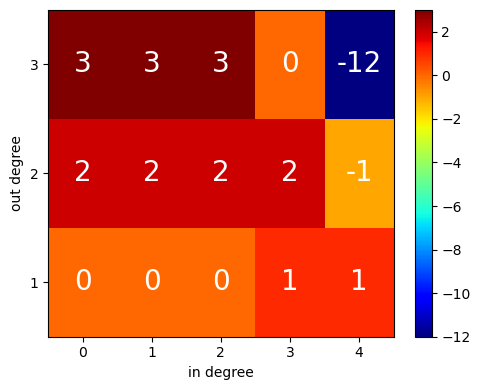

In [9]:
import matplotlib as mpl
from graphtda.bifiltration_utils import plot_ECP, EC_at_bifiltration

fig, ax = plt.subplots(1, figsize=(5, 4))

f1max = max([i[0][0] for i in ecp])
f1min = min([i[0][0] for i in ecp])
f2max = max([i[0][1] for i in ecp])
f2min = min([i[0][1] for i in ecp])


plot_ECP(ecp, (f1min, f1max+1, f2min, f2max+1), ax,
         cmap='jet', colorbar=True, norm=mpl.colors.Normalize(vmin=-12, vmax=3))

ax.set_xlabel('in degree')
ax.set_ylabel('out degree')
# axs.set_title('clean circle')

ax.set_xticks(np.array([0,1,2,3,4])+[0.5], labels=[0, 1,2,3,4])
ax.set_yticks(np.array([1,2,3])+[0.5], labels=[1,2,3])


for ii,i in enumerate([0,1,2,3,4]):
    for jj,j in enumerate([1,2,3]):
        plt.text(ii+0.5,jj+1.5,
                 EC_at_bifiltration(ecp, i, j),
                 ha='center',va='center',
                 size=20,color='w')

plt.tight_layout()

## Undirected Graph

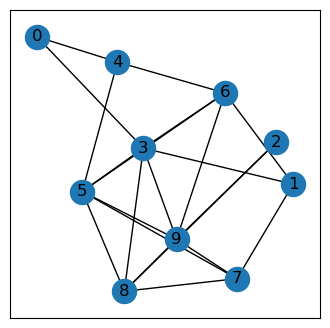

In [10]:
# lets convert D to an undirected graph
G = nx.Graph(D)

fig, ax = plt.subplots(1, figsize=(4,4))
nx.draw_networkx(G, pos=nx.spring_layout(D, seed=2), ax=ax)

In [11]:
from graphtda.graphtda import degree_filtration

In [12]:
FG_2 = FilteredGraph(G, filtration_function=degree_filtration)

In [13]:
# Now the ECP will be one-dimensional
ecp_2 = FG_2.compute_ECP()
ecp_2

[((2,), 2), ((3,), 1), ((5,), -2), ((6,), -12)]

In [18]:
from graphtda.bifiltration_utils import euler_characteristic_list_from_all, plot_euler_curve

In [19]:
ecc = euler_characteristic_list_from_all(ecp)
ecc

[[0, 3], [3, 0], [4, -12]]

<Axes: xlabel='Filtration', ylabel='Euler Characteristic'>

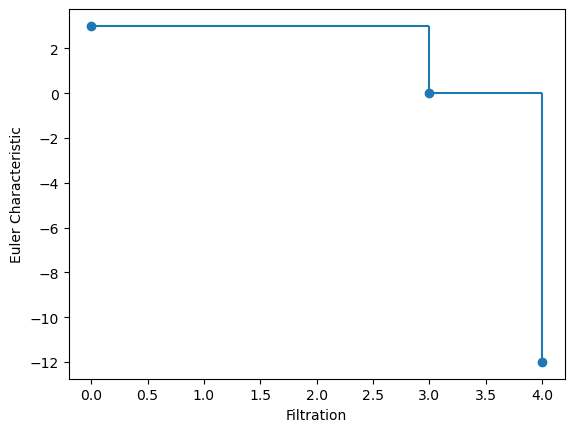

In [20]:
plot_euler_curve(ecc, with_lines=True)